### Problem Statement: Automated Customer Support for Online Banking Queries

Customers of Standard Chartered Bank frequently have basic banking queries.

Manually handling such questions through human agents is costly and time-consuming. A chatbot powered by Retrieval-Augmented Generation (RAG) can significantly improve customer support by:

Retrieving relevant answers from the Standard Chartered FAQs.

Generating natural and context-aware responses using an LLM.


Data Source: Standard Chartered Bank’s official FAQs (https://www.sc.com/sg/help/faqs/bank-with-us-faqs/)

This structured information provides authoritative answers to common customer inquiries.
Using RAG: Instead of relying solely on an LLM (which may hallucinate or provide inaccurate responses), we retrieve the most relevant FAQ content and let the LLM generate a well-structured response.
Why RAG is a Good Fit?

Ensures accuracy by retrieving up-to-date, bank-approved information.
Improves response coherence by allowing an LLM to rephrase retrieved data into conversational, user-friendly answers.
Handles diverse customer queries while maintaining consistency with official policies.



### Using Langchain dependencies:


  

In [6]:
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00



### Using LangSmith for inspection



In [7]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

··········




## Components

We will need to select three components from LangChain's suite of integrations.

import ChatModelTabs from "@theme/ChatModelTabs";

<ChatModelTabs customVarName="llm" />


In [8]:
import getpass
import os
%pip install -U langchain-groq
if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("llama3-8b-8192", model_provider="groq")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.1 MB/s eta 0:00:00
Enter API key for Groq: ··········


import EmbeddingTabs from "@theme/EmbeddingTabs";

<EmbeddingTabs/>

In [9]:
%pip install -qU langchain-huggingface

from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

import VectorStoreTabs from "@theme/VectorStoreTabs";

<VectorStoreTabs/>

In [10]:
%pip install -qU langchain-core
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)


## 1. Indexing

### Loading documents


In [11]:
from langchain.document_loaders import WebBaseLoader
import bs4

loader = WebBaseLoader(
    web_paths=("https://www.sc.com/sg/help/faqs/bank-with-us-faqs/",),
)
docs = loader.load()


In [12]:
clean_content = "\n".join([line.strip() for line in docs[0].page_content.split("\n") if line.strip()])
print("\nCleaned content sample:")
print(clean_content[:10000])


Cleaned content sample:
Bank With Us: FAQs - Standard Chartered Singapore
Personal
Priority
International
Business
Private
Referral Sign Up
Search
Digital Banking
Standard Chartered
Accounts & Deposits
Savings, Fixed Deposits, Remittances
Accounts & Deposits
Everyday Use
Bonus$aver Account
Up to 6.05 % p.a interest
Choose how your money grows
Enjoy up to S$188 cashback when you sign up for a Bonus$aver Account and a Bonus$aver World Mastercard Credit Card!
Savings
e$aver Account
Earn up to 2.90 % p.a
High yield savings account with the flexibility to access your cash at any time.
Wealth Building
Wealth $aver Account
Up to 5.50 % p.a
A Priority Banking account to help you grow your
wealth
Receive welcome gifts of up to
S$18,000 in value when you
sign up for Priority Banking
+1% Unlimited Cashback on your
debit card
Compare accounts and choose the one that
best suits your needs
View And Compare Accounts
Current and Savings
First$aver Account
The savings account for youths
USD$aver Accou


### Splitting documents


We have considered chunking with context and metadata extraction here



In [13]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.schema import Document

# Initialize Recursive Character Text Splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,      # Ensures 1-2 full Q&A pairs per chunk
    chunk_overlap=200,    # Overlaps ~1 paragraph for better context continuity
    add_start_index=True,
    separators=["\n\n", "\n", "  ", " "],  # Prioritizes natural text boundaries
)

# Function to clean up chunked text
def clean_text(text: str) -> str:
    """Removes extra empty lines and trims whitespace in chunks."""
    return "\n".join([line.strip() for line in text.split("\n") if line.strip()])

# Split documents into cleaned chunks
all_splits = text_splitter.split_documents(docs)

# Apply cleanup to remove empty lines from chunks
cleaned_splits = [
    Document(page_content=clean_text(chunk.page_content), metadata=chunk.metadata)
    for chunk in all_splits
]

# Print summary
print(f"✅ Split document into {len(cleaned_splits)} cleaned chunks:")
print("\n".join([f"Chunk {i+1}: {len(c.page_content)} chars"
               for i, c in enumerate(cleaned_splits[:3])]) + "\n...")


✅ Split document into 230 cleaned chunks:
Chunk 1: 247 chars
Chunk 2: 244 chars
Chunk 3: 235 chars
...



### Storing documents


In [14]:
document_ids = vector_store.add_documents(documents=all_splits)

print(document_ids[:3])

['52eafa1e-8131-402d-8c31-ee427c9bb4c4', '783f6adc-b844-407c-8b01-2b3343ea0710', '80fab216-d4b4-4061-9c32-0fd3bbda5990']



This completes the **Indexing** portion of the pipeline. At this point
we have a query-able vector store containing the chunked contents of our
website.

## 2. Retrieval and Generation


We’ll use a prompt for RAG that is checked into the LangChain prompt hub
([here](https://smith.langchain.com/hub/rlm/rag-prompt)).

In [15]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


We'll use [LangGraph](https://langchain-ai.github.io/langgraph/) to tie together the retrieval and generation steps into a single application.


To use LangGraph, we need to define three things:

1. The state of our application;
2. The nodes of our application (i.e., application steps);
3. The "control flow" of our application (e.g., the ordering of the steps).

#### State:

The [state](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of our application controls what data is input to the application, transferred between steps, and output by the application.
For a simple RAG application, we can just keep track of the input question, retrieved context, and generated answer:

In [16]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict

class State(TypedDict):
    question: str
    context: List[tuple[Document, float]]  # ✅ Store both document and score
    answer: str


#### Nodes



In [17]:
def retrieve(state: State):
    retrieved_docs_with_scores = vector_store.similarity_search_with_score(state["question"])
    return {"context": retrieved_docs_with_scores}  # ✅ Returns (Document, score)

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc, _ in state["context"])  # ✅ Extract doc, ignore score
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}




#### Control flow

Finally, we compile our application into a single `graph` object. In this case, we are just connecting the retrieval and generation steps into a single sequence.

In [18]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()


LangGraph also comes with built-in utilities for visualizing the control flow

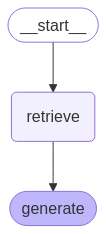

In [19]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

#### Usage


In [20]:
result = graph.invoke({"question": "What do I need to prepare for a risk review?"})

print("🟢" * 50)
print(f"QUESTION: {result['question']}\n")
print(f"ANSWER: {result['answer']}\n")

print("🔍 CONTEXT USED:")

# Ensure the context exists and is in the expected format
context_data = result.get("context", [])

if context_data and isinstance(context_data[0], tuple):
    # ✅ Properly handle (Document, score) tuples
    for i, (doc, score) in enumerate(context_data[:3]):  # Show top 3 context chunks
        cleaned_content = doc.page_content.replace('\n', ' ').strip()[:200]  # Clean text
        print(f"\n{'━' * 40}")
        print(f"CONTEXT CHUNK {i+1}:")
        print(f"Source: {doc.metadata.get('source', 'Unknown')}")
        print(f"Similarity Score: {score:.4f}")  # Display similarity score
        print(f"Content Preview:\n{cleaned_content}...\n")

elif context_data and isinstance(context_data[0], Document):
    # 🛑 Fallback: If retrieval failed to return scores, warn the user
    print("⚠️ Warning: Similarity scores missing. Showing document chunks only.")
    for i, doc in enumerate(context_data[:3]):
        cleaned_content = doc.page_content.replace('\n', ' ').strip()[:200]
        print(f"\n{'━' * 40}")
        print(f"CONTEXT CHUNK {i+1}:")
        print(f"Source: {doc.metadata.get('source', 'Unknown')}")
        print(f"Content Preview:\n{cleaned_content}...\n")

else:
    print("❌ No relevant documents found.")

print("🟢" * 50)




🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢
QUESTION: What do I need to prepare for a risk review?

ANSWER: To prepare for a risk review, you need to read and understand the Risk Warning Statement (RWS) and contact your Relationship Manager or visit a branch if you have any questions. The RWS warns you of the possible risks associated with foreign-listed investment products, including Excluded Investment Products (EIPs).

🔍 CONTEXT USED:

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
CONTEXT CHUNK 1:
Source: https://www.sc.com/sg/help/faqs/bank-with-us-faqs/
Similarity Score: 0.3948
Content Preview:
The Bank is required to obtain the customer's acknowledgement that he/she has read and understood the Risk Warning Statement (RWS). Acknowledgement of the RWS applies to all foreign-listed investment ...


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
CONTEXT CHUNK 2:
Source: https://www.sc.com/sg/help/faqs/bank-with-us-faqs/
Similarity Score: 0.3662
Content Preview:
What is the Risk Warning S


####  If we want to customize the prompt later, we can use the following


In [21]:
from langchain_core.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""
custom_rag_prompt = PromptTemplate.from_template(template)

## Now that we have a basic RAG, one common problem arise when users ask vague questions, or questions outside of the context
If we're working with a similarity search-based index, like a vector store, then searching on raw questions may not work well because their embeddings may not be very similar to those of the relevant documents.

Instead it might help to have the model generate a hypothetical relevant document, and then use that to perform similarity search. One way to tackle this problem is by using Hypothetical Document Embedding (HyDE)

HyDE is a technique that combines two types of embeddings:

Traditional term-based embeddings (like TF-IDF or BM25) that focus on exact matches of terms or keywords in documents.

Contextual embeddings (like those from transformer-based models) that focus on the semantic meaning and context of words, even when they don’t appear exactly in the text.

Therefore, in my opinion, HyDE is a form of hybrid retrieval, and probably better than pure hybrid retrieval method. If given more time we could try combining HyDE with a pure hybrid retrieval approach (for example, adding BM25) for fine-grained control or performance optimization.

## Retrieval and Generation with HyDE

In [22]:
from typing import List, Tuple
from langchain.schema import Document


# Define state for application (store both document, score, and hypothetical doc)
class State(TypedDict):
    question: str
    hypothetical_doc: str  # ✅ Store the generated hypothetical document
    context: List[Tuple[Document, float]]  # ✅ Store (Document, similarity score)
    answer: str

# Define application steps
def generate_hypothetical_answer(question: str) -> str:
    """Generate a hypothetical document based on the given question."""
    messages = [
        {"role": "system", "content": "Generate a possible answer to the following question as if it were a document excerpt:"},
        {"role": "user", "content": question}
    ]
    response = llm.invoke(messages)
    return response.content  # ✅ Return hypothetical document

def retrieve(state: State):
    """Retrieve relevant documents based on a hypothetical answer."""
    hypothetical_answer = generate_hypothetical_answer(state["question"])

    # ✅ Retrieve (Document, score) pairs
    retrieved_docs_with_scores = vector_store.similarity_search_with_score(hypothetical_answer)

    return {"hypothetical_doc": hypothetical_answer, "context": retrieved_docs_with_scores}  # ✅ Include hypothetical document

def generate(state: State):
    """Generate the final answer using the retrieved documents."""

    # ✅ Extract just the document contents, ignoring scores
    docs_content = "\n\n".join(doc.page_content for doc, _ in state["context"])

    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)

    return {"answer": response.content}

# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()


Lets try a question : "I think I made a payment to my credit card yesterday, but I'm not sure if it went through. How can I check if my payment was successful?"

I got this questions by prompting chatgpt 4o :give me a question about credit card that is vague and might be outside the context of the given website , but look like a common question provided by customers, then I provided chatgpt 4o with the text of credit card section from the website. Chatgpt commented this question is appropriate since:  the question is vague (doesn't specify whether it's a self-transfer, third-party transfer, or FAST payment). A direct answer isn’t explicitly found in the given text, but inference might fill the gap using relevant details.

In [23]:
result = graph.invoke({"question": "I think I made a payment to my credit card yesterday, but I'm not sure if it went through. How can I check if my payment was successful?"})

print("🟢" * 50)
print(f"QUESTION: {result['question']}\n")

# ✅ Show the generated hypothetical document
print("📄 HYPOTHETICAL DOCUMENT GENERATED:")
print(f"{result['hypothetical_doc']}\n")

print(f"ANSWER: {result['answer']}\n")

print("🔍 CONTEXT USED:")
for i, (doc, score) in enumerate(result["context"][:3]):  # Show top 3 context chunks
    cleaned_content = doc.page_content.replace('\n', ' ').strip()[:200]
    print(f"\n{'━' * 40}")
    print(f"CONTEXT CHUNK {i+1}:")
    print(f"Source: {doc.metadata.get('source', 'Unknown')}")
    print(f"Similarity Score: {score:.4f}")
    print(f"Content Preview:\n{cleaned_content}...\n")

print("🟢" * 50)



🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢
QUESTION: I think I made a payment to my credit card yesterday, but I'm not sure if it went through. How can I check if my payment was successful?

📄 HYPOTHETICAL DOCUMENT GENERATED:
**Excerpt from Credit Card Statement FAQs**

**Q: How can I check if my payment was successful?**

A: Congratulations on taking the initiative to verify your payment! To check if your payment was successful, you can follow these steps:

1. Log in to your online credit card account: Go to our website and sign in to your online account using your username and password.
2. View your account activity: Once logged in, navigate to the "Account Activity" or "Transaction History" section, where you'll see a list of all your recent transactions.
3. Check the payment date and status: Look for the payment you made yesterday and verify if the payment date is correct. If the payment date is correct, check the status of the transaction. If it says "Processed" or "Succes

## Now that we have RAG with HyDE, we can further improve it by adding a Guardrail Verification to ensure the LLM-generated response is factually correct by cross-checking with retrieved documents.

We apply Guardrail verification layer after having HyDE to ensure LLM-generated responses remain accurate.

Combines HyDE + Guardrails to improve both retrieval quality and response reliability

In [24]:
import logging
from typing import List, TypedDict
from langchain.schema import Document
from langchain.schema.runnable import RunnableLambda

from transformers import pipeline


# Configure logging
logging.basicConfig(filename="guardrail_rejections.log", level=logging.INFO, format="%(asctime)s - %(message)s")

# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str
    attempts: int  # Track number of retry attempts


# Load NLI model for fact-checking
nli_pipeline = pipeline("text-classification", model="facebook/bart-large-mnli")

# Define application steps

def generate_hypothetical_answer(question: str) -> str:
    """Generate a hypothetical answer for the given question using LLM."""
    print("\n🔍 Generating a hypothetical question-based answer...")
    messages = [
        {"role": "system", "content": "Generate a possible answer to the following question:"},
        {"role": "user", "content": question}
    ]
    response = llm.invoke(messages)
    print(f"✨ Hypothetical Answer: {response.content}\n")
    return response.content  # Hypothetical answer

def retrieve(state: State):
    """Retrieve relevant documents based on a hypothetical answer."""
    hypothetical_answer = generate_hypothetical_answer(state["question"])
    retrieved_docs_with_scores = vector_store.similarity_search_with_score(hypothetical_answer)  # Use generated answer for retrieval

    print("📚 Retrieved Documents:")
    for idx, (doc, score) in enumerate(retrieved_docs_with_scores):
        print(f"Chunk {idx + 1}: {doc.page_content[:200]}...")  # Show only first 200 chars
        print(f"Similarity Score: {score:.4f}")  # Display similarity score

    return {"context": retrieved_docs_with_scores, "attempts": 0}  # Initialize retry count

def generate(state: State):
    """Generate the final answer using the retrieved documents."""
    docs_content = "\n\n".join(doc.page_content for doc, _ in state["context"])  # Get only document content
    messages = [
        {"role": "system", "content": "Use the following information to answer the question accurately:"},
        {"role": "user", "content": f"Context: {docs_content}\n\nQuestion: {state['question']}"}
    ]
    response = llm.invoke(messages)

    print("\n🤖 Generated Answer (before verification):")
    print(response.content)

    return {"answer": response.content}

def fact_check(state: State):
    """Cross-check LLM-generated response against retrieved documents to prevent hallucinations."""
    response = state["answer"]
    retrieved_docs = state["context"]
    attempts = state["attempts"]

    for doc, _ in retrieved_docs:
        check = nli_pipeline([f"Premise: {doc.page_content} Hypothesis: {response}"])
        label = check[0]["label"]

        if label == "contradiction":  # Response contradicts retrieved facts
            logging.info(f"❌ Rejected response: {response} | Question: {state['question']} | Attempt: {attempts}")
            print("\n⚠️ Hallucination detected! The answer contradicts the retrieved facts.")

            if attempts < 2:  # Retry up to 2 times
                print(f"🔄 Retrying response generation... (Attempt {attempts + 1})")
                state["attempts"] += 1
                return generate(state)  # Retry response generation

            print("🚨 Maximum retries reached. Returning a fallback response.")
            return {"answer": "I'm sorry, but I couldn't verify the accuracy of this information."}

    print("✅ Fact-check passed! The response aligns with retrieved documents.")
    return state  # Pass through if verified

# Compile application with Guardrail verification & retry mechanism
graph_builder = StateGraph(State).add_sequence([retrieve, generate, fact_check])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [25]:
test_question = "I think I made a payment to my credit card yesterday, but I'm not sure if it went through. How can I check if my payment was successful?"
response = graph.invoke({"question": test_question})

# Print final response
print("\n🎯 Final Validated Answer:")
print(response["answer"])




🔍 Generating a hypothetical question-based answer...
✨ Hypothetical Answer: You can check if your payment was successful by following these steps:

1. Log in to your online banking account: Go to your bank's website and log in to your online banking account using your username and password.
2. Check your account activity: Once you're logged in, click on the "Account Activity" or "Transaction History" tab to view a list of recent transactions.
3. Look for the payment: Search for the payment you made to your credit card by date, amount, or description. If you see the payment listed, it's likely that it was successful.
4. Check your credit card account: Log in to your credit card account online or through the mobile app to see if the payment has been applied to your account.
5. Check your bank statement: If you're unable to find the payment in your online banking activity, check your bank statement for the payment. It may take a few days for the payment to appear on your statement.
6. Co

📚 Retrieved Documents:
Chunk 1: How do I know that my bill payment transaction is successful?
The successful bill payment transaction will be reflected in your next billing statement with the respective billing organizations. You ca...
Similarity Score: 0.6631
Chunk 2: How do I know if the payment request has been submitted successfully? 
You can check the status of your payment request by:

                                                
Logging into online bank...
Similarity Score: 0.6289
Chunk 3: What should I do if the payee does not receive the Cheque?
You can inform the Bank to stop payment of the eCashier Order.

How can I cancel a request to eCashier's Order?
The Cashier's Order can only ...
Similarity Score: 0.4977
Chunk 4: What should I do if I am not able to perform any financial transaction?
Ensure that you are using one of the recommended browsers. If you have encountered problems logging, please call our Customer Se...
Similarity Score: 0.4754

🤖 Generated Answer (before

✅ Fact-check passed! The response aligns with retrieved documents.

🎯 Final Validated Answer:
According to the provided information, you can check the status of your payment request by logging into online banking, going to Payments & Transfers > Payments / Transfers History, and checking if the status is "Successful" or "Rejected".


In the future, if different versions of Standard Chartered Bank's official FAQs are published (e.g., older or newer versions released at different times), we could implement a time-decaying document weighting mechanism. This approach would help address potential conflicts when retrieving multiple documents that may contain contradictory information. By giving more weight to the most recent versions, we can ensure that the information retrieved aligns with the latest updates while mitigating issues caused by conflicting data from older versions.

### Evaluation

The dataset is generated using ChatGPT-4o with the following process:

The model is provided with content from a webpage.

From this content, the model randomly selects declarative sentences as ground truth answers.

For each ground truth answer, the model generates a realistic customer-style question that could naturally lead to that answer.

If the webpage content is already in a Q&A format, the generated question should not simply copy the original question but should instead be phrased in a way that a real human customer might ask.

The model provides 10 question-answer pairs in this format.

This method is used instead of directly generating Q&A pairs because:

Creating a question based on a given answer is more stable and reliable than generating an answer from a question.

It reduces the risk of incorrect or misleading responses, as the selected answers are directly sourced from the provided webpage.



In [37]:
from langsmith import Client
from typing import Annotated, TypedDict
from typing import Dict, List
from pydantic import BaseModel
from langchain.schema import Document
import os
os.environ["LANGCHAIN_API_KEY"] = "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"
os.environ["LANGCHAIN_TRACING_V2"] = "true"  # Required for evaluation


# Initialize client after setting API key
client = Client(
    api_url="https://api.smith.langchain.com",
    api_key=os.environ["LANGCHAIN_API_KEY"]
)
# Initialize LangSmith client
#client = Client()

# ======================
# Evaluation Dataset
# ======================
dataset_name = "Standard Chartered Customer Support"
examples = [
    (
        "What is Bill Payment and how does it work?",
        "Bill payment is a free service that allows you to make payment to any of our participating billing organizations."
    ),
    (
        "Can I schedule my bill payments for a later date?",
        "Yes, you can set a future date or schedule a recurring instruction for your bill payment."
    ),
    (
        "How long does it take for the payment to reach the billing organization?",
        "Please allow at least 2 to 3 days from the day of your payment date for the payee to receive your payment."
    ),
    (
        "Who can use the online Bill Payment service?",
        "As long as you have an SGD savings, current, or Cheque & Save account, and the bill reference number, you can use this service."
    ),
    (
        "How can I track the status of my International Fund Transfer?",
        "You can check your debiting account to verify that the transaction has been completed or view the transfer history."
    ),
    (
        "What happens if I try to pay my bill but have insufficient funds?",
        "Your payment instruction will be rejected if there are insufficient funds in your account on the effective due date."
    ),
    (
        "Is there a limit on how much I can transfer for an International Fund Transfer?",
        "Yes, all online telegraphic transfers are subjected to a daily limit of SGD 200,000 or equivalent."
    ),
    (
        "How secure is the eCashier's Order service?",
        "The eCashier's Order service is secured with two-factor authentication and can only be sent to Payees registered with the Bank."
    ),
    (
        "Can I cancel my scheduled bill payment?",
        "Yes, you can delete your scheduled payment instructions one business day before the effective due date."
    ),
    (
        "How can I use eCashier's Order to make payments?",
        "Simply enter the name and address of the payee, and the bank will print and mail the cashier's order on your behalf."
    ),
]


# Create dataset if not exists
if not client.has_dataset(dataset_name=dataset_name):
    dataset = client.create_dataset(dataset_name=dataset_name)
    client.create_examples(
        inputs=[{"question": q} for q, _ in examples],
        outputs=[{"answer": a} for _, a in examples],
        dataset_id=dataset.id,
    )

# ======================
# Evaluation Models
# ======================
class CorrectnessGrade(BaseModel):
    explanation: str
    correct: bool

class RelevanceGrade(BaseModel):
    explanation: str
    relevant: bool

class GroundedGrade(BaseModel):
    explanation: str
    grounded: bool

class RetrievalRelevanceGrade(BaseModel):
    explanation: str
    relevant: bool

# ======================
# Evaluation Logic
# ======================
def parse_grade(response, grade_model):
    """Extract and parse JSON from LLM response"""
    try:
        content = response.content if hasattr(response, 'content') else response

        # Extract JSON from markdown code block
        if '```json' in content:
            json_str = content.split('```json')[1].split('```')[0].strip()
        else:
            json_str = content

        return grade_model.model_validate_json(json_str)
    except Exception as e:
        print(f"Error parsing grade: {e}\nRaw response: {content}")
        return grade_model(
            explanation=f"Parsing failed: {str(e)}",
            **{list(grade_model.model_fields.keys())[1]: False}
        )
# Grader Instructions with JSON Formatting
correctness_instructions = """Check factual accuracy of student answer relative to ground truth. It is okay if the student answer contains more information than the ground truth answer, as long as it is factually accurate relative to the  ground truth answer. Return JSON:
```json
{
    "explanation": "Step-by-step analysis...",
    "correct": true/false
}```"""

relevance_instructions = """Check STUDENT ANSWER is relevant to the QUESTION. Return JSON:
```json
{
    "explanation": "Step-by-step analysis...",
    "relevant": true/false
}```"""

grounded_instructions = """Check answer grounding in facts. Return JSON:
```json
{
    "explanation": "Step-by-step analysis...",
    "grounded": true/false
}```"""

retrieval_relevance_instructions = """Check document relevance. Return JSON:
```json
{
    "explanation": "Step-by-step analysis...",
    "relevant": true/false
}```"""

# Initialize grader LLMs
grader_llm = llm
relevance_llm = llm
grounded_llm = llm
retrieval_relevance_llm = llm

# Evaluator Functions
def correctness(inputs: Dict, outputs: Dict, reference_outputs: Dict) -> bool:
    content = f"""QUESTION: {inputs['question']}
GROUND TRUTH: {reference_outputs['answer']}
STUDENT ANSWER: {outputs['answer']}"""

    response = grader_llm.invoke([
        {"role": "system", "content": correctness_instructions},
        {"role": "user", "content": content}
    ])
    return parse_grade(response, CorrectnessGrade).correct

def relevance(inputs: Dict, outputs: Dict) -> bool:
    content = f"QUESTION: {inputs['question']}\nANSWER: {outputs['answer']}"
    response = relevance_llm.invoke([
        {"role": "system", "content": relevance_instructions},
        {"role": "user", "content": content}
    ])
    return parse_grade(response, RelevanceGrade).relevant

def groundedness(inputs: Dict, outputs: Dict) -> bool:
    docs = "\n".join(d.page_content for d in outputs["documents"])
    content = f"FACTS:\n{docs}\nANSWER: {outputs['answer']}"
    response = grounded_llm.invoke([
        {"role": "system", "content": grounded_instructions},
        {"role": "user", "content": content}
    ])
    return parse_grade(response, GroundedGrade).grounded

def retrieval_relevance(inputs: Dict, outputs: Dict) -> bool:
    docs = "\n".join(d.page_content for d in outputs["documents"])
    content = f"QUESTION: {inputs['question']}\nDOCUMENTS:\n{docs}"
    response = retrieval_relevance_llm.invoke([
        {"role": "system", "content": retrieval_relevance_instructions},
        {"role": "user", "content": content}
    ])
    return parse_grade(response, RetrievalRelevanceGrade).relevant




### Run evaluation

In [38]:
# ======================
# Evaluation Runner
# ======================
def target(inputs: dict) -> dict:

    result = graph.invoke({"question": inputs["question"]})

    # Format documents for evaluation
    documents = [
        Document(
            page_content=doc.page_content,
            metadata=doc.metadata
        ) for doc, _ in result["context"]
    ]

    return {
        "answer": result["answer"],
        "documents": documents
    }



# Run full evaluation
experiment_results = client.evaluate(
    target,
    data=dataset_name,
    evaluators=[correctness, groundedness, relevance, retrieval_relevance],
    experiment_prefix="rag-evaluation-v2",
    metadata={
        "system": "RAG with hypothetical retrieval and NLI guardrails",
        "retriever": "Hypothetical answer-based",
        "fact_checker": "facebook/bart-large-mnli"
    },
)


print("Evaluation complete! ")


View the evaluation results for experiment: 'rag-evaluation-v2-8d01849c' at:
https://smith.langchain.com/o/29bd59db-7f2a-41e1-a0fa-bfc1e9997197/datasets/fdcf360f-84d9-4edc-996c-3fb3787a76e2/compare?selectedSessions=11aa6677-15c6-4b63-bdaa-eb5efac931ac




0it [00:00, ?it/s]


🔍 Generating a hypothetical question-based answer...
✨ Hypothetical Answer: The online Bill Payment service is available to all customers who have a valid account with our bank, including personal and business account holders. To use the service, customers must:

* Be at least 18 years old
* Have a valid email address and phone number
* Have a checking or savings account with our bank
* Have a valid routing and account number
* Have a login username and password
* Have a valid payment method (such as a credit card or debit card)

Note that some restrictions may apply, such as:

* Customers with inactive or dormant accounts may not be eligible to use the online Bill Payment service
* Customers with certain types of accounts, such as credit card accounts or loan accounts, may not be eligible to use the online Bill Payment service
* Customers who are not authorized to use the account may not be able to access the online Bill Payment service

Customers who are unsure about their eligibili

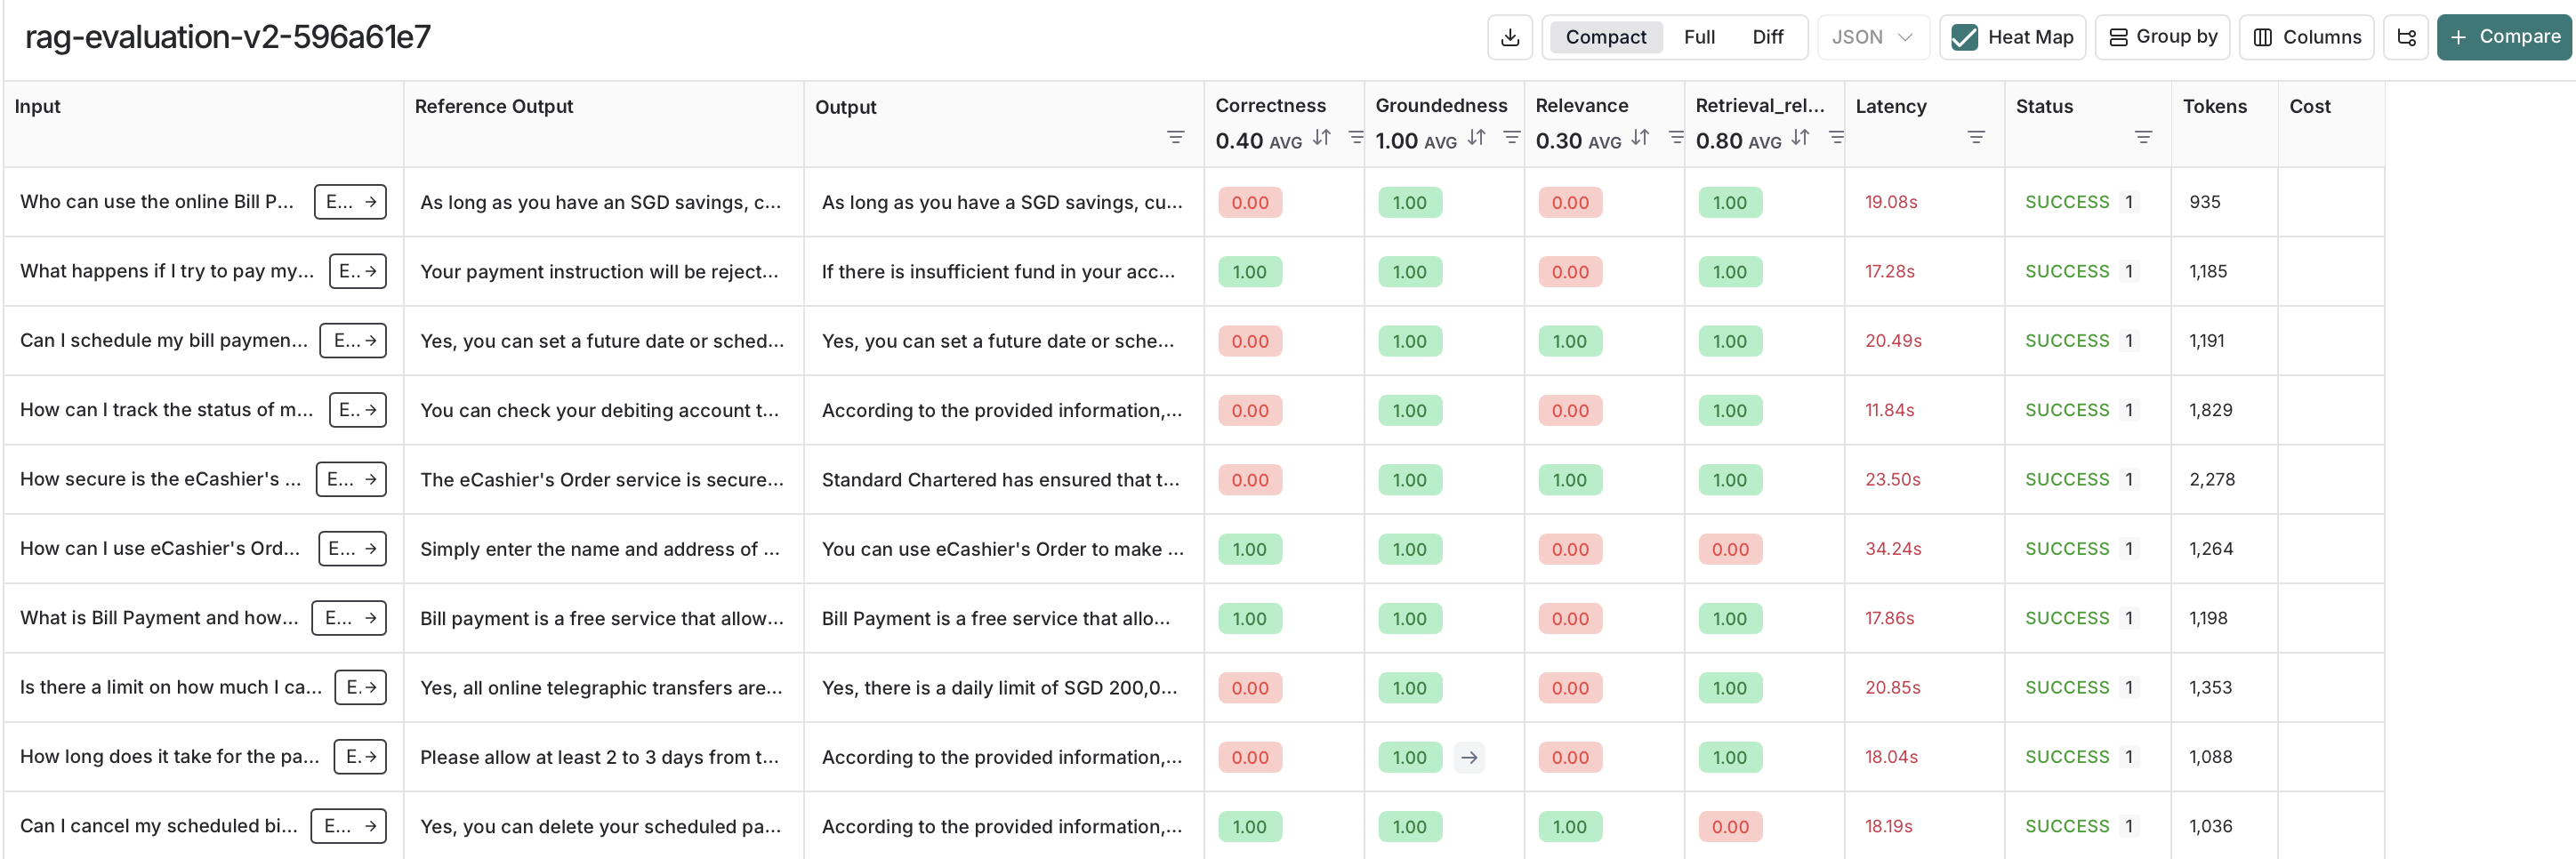

High score in groundness is expected because of the implementation of  Guardrail Verification. High retrieval relevancy is also kind of expecetd since we have HyDE that helps with retrieving the right chuncks. Low relevance is a little surprising given the high retrieval relevancy and the reason might lie in the llm that eventually generates response. Correctness might be the main direction to improve in the future, if the prompt is for correctness checking is at its best. I did spent quite some time trying to get suitable prompt for LLM as judge, as the fair prompts should neither be too strict nor too lenient for judging. Key lessons learned: LLM-based evaluation requires careful prompt engineering and validation

If given more time, I will implement more specific metrics such as BERTScore.

## Discussion
Strengths:
*   Langchain framework gives seamless integration of implementation of various methods.

*   Use HyDE to help with interpreting customer questions and document retrieval.

*   Implemented Guardrail Verification to prevent LLM hallucination, especially for task of finance that people trusting LLM's hallucination could lead to serious consequences.

*   Reusable Framework: Modular design allows easy adaptation to new datasets or evaluation criteria.

Weaknesses:

*   Static Dataset: Fixed evaluation examples may not capture real-world query distribution.
*   Could have more document to give more diverse information for retrieval, with implementatoin of weighting mechanism to determine importance of each document in the case of conflicting information

Improvements & Future Directions:

*   Hybrid Evaluation: Combine LLM-based metrics with traditional NLP metrics (BLEU, ROUGE)
*   Dynamic Dataset Generation: Implement synthetic query generation for broader content coverage and difficulty coverage
*   Human-in-the-Loop: Add manual validation for edge cases through LangSmith UI
*   Multi-dimensional Scoring: Introduce 5-point scales instead of binary true/false (with this also need to consider if LLM is certain bias in interpreting scores eg. LLM may believe in difference between 4 and 5 is smaller than difference between 3 and 4, non-uniform interpretation of scores)
*   Domain-Specific Metrics: Incorporate financial compliance checks (e.g., disclaimer verification)
*   Performance Optimization: Parallelize evaluator calls using async processing

*   Continuous Evaluation: establishing a systematic process to automatically test and validate your RAG system whenever components are updated, ensuring changes don't degrade performance.












